## Image Classification by using CNN

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense, Flatten


## Load Data set

In [41]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv' , delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [11]:
print("Shape of X_train:" , X_train.shape)
print("Shape of Y_train:" , Y_train.shape)
print("Shape of X_test:" , X_test.shape)
print("Shape of Y_test:" , Y_test.shape)


Shape of X_train: (2000, 30000)
Shape of Y_train: (2000,)
Shape of X_test: (400, 30000)
Shape of Y_test: (2000,)


## Reshape Data 

In [42]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test =X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [43]:
print("Shape of X_train:" , X_train.shape)
print("Shape of Y_train:" , Y_train.shape)
print("Shape of X_test:" , X_test.shape)
print("Shape of Y_test:" , Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [ ]:
X_train[1,:]

## Normalize the data instead of 0 to 255 bring them in 0 to 1

In [44]:
X_train = X_train/255.0
Y_train = Y_train/255.0
X_test = X_test/255.0
Y_test = Y_test/255.0

In [ ]:
X_train[1,:]

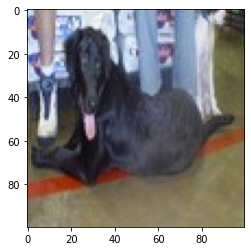

In [29]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

## Model 

In [45]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu' , input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64 , activation = 'relu'), # fully connected layers - 64 neurons in the first layer
    Dense(1, activation = 'sigmoid')
    
       
])

The other way defining Sequential model #layers are stacked on each other

In [46]:
model = Sequential()

model.add(Conv2D(32 , (3,3), activation = 'relu', input_shape= (100 , 100 , 3)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [48]:
model.compile(loss ='binary_crossentropy' , optimizer= 'adam' , metrics =['accuracy'] )

In [49]:
model.fit(X_train , Y_train , epochs = 5 , batch_size= 64)

Epoch 1/5
32/32 [==============================] - 6s 185ms/step - loss: 0.0897 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 6s 179ms/step - loss: 0.0173 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 6s 180ms/step - loss: 0.0162 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 6s 184ms/step - loss: 0.0155 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 7s 208ms/step - loss: 0.0149 - accuracy: 0.5000


In [50]:
model.evaluate(X_test , Y_test)

13/13 [==============================] - 0s 26ms/step - loss: 0.0153 - accuracy: 0.5000


[0.015349302440881729, 0.5]

## Make predictions on y test

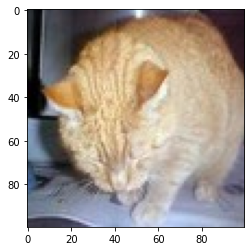

Our Model says , its a :  cat


In [64]:
idx2 = random.randint(0 , len(Y_test))
plt.imshow(X_test[idx2 , :])
plt.show()

y_pred = model.predict(X_test[idx2 , :].reshape(1 , 100 , 100 , 3))
y_pred = y_pred < 0.5


if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our Model says , its a : " ,pred)